In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install transformers
!pip install sentence-transformers
!pip install torch

# Step 2: Load the dataset and preprocess it
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 57.2 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.7/401.7 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 93.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 67.7 MB/s eta 0:00:00
  Attempting uninstall: safetensors
    Found existing installation: safetensors 0.3.1
    Uninstalling safetensors-0.3.1:
      Successfully uninstalled safetensors-0.3.1
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.14.1
    Uninstalling huggingface-hub-0.14.1:
      Successfully uninstalled huggingface-hub-0.14.1
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
  Attempting uninstall: transformers
    Found exi

In [5]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
import tensorflow as tf
from transformers import TFBertModel
# # Load data and set labels
df = pd.read_csv("/kaggle/input/wikipedia-movie-plots/wiki_movie_plots_deduped.csv")

print(df.shape)



(34886, 8)


In [6]:
print(df.head())
print(df.info())

   Release Year                             Title Origin/Ethnicity  \
0          1901            Kansas Saloon Smashers         American   
1          1901     Love by the Light of the Moon         American   
2          1901           The Martyred Presidents         American   
3          1901  Terrible Teddy, the Grizzly King         American   
4          1902            Jack and the Beanstalk         American   

                             Director Cast    Genre  \
0                             Unknown  NaN  unknown   
1                             Unknown  NaN  unknown   
2                             Unknown  NaN  unknown   
3                             Unknown  NaN  unknown   
4  George S. Fleming, Edwin S. Porter  NaN  unknown   

                                           Wiki Page  \
0  https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...   
1  https://en.wikipedia.org/wiki/Love_by_the_Ligh...   
2  https://en.wikipedia.org/wiki/The_Martyred_Pre...   
3  https://en.wikipedia.

**Movies per Year**
* Visualize the distribution of movies over the years to identify trends, such as increases in movie production over time.



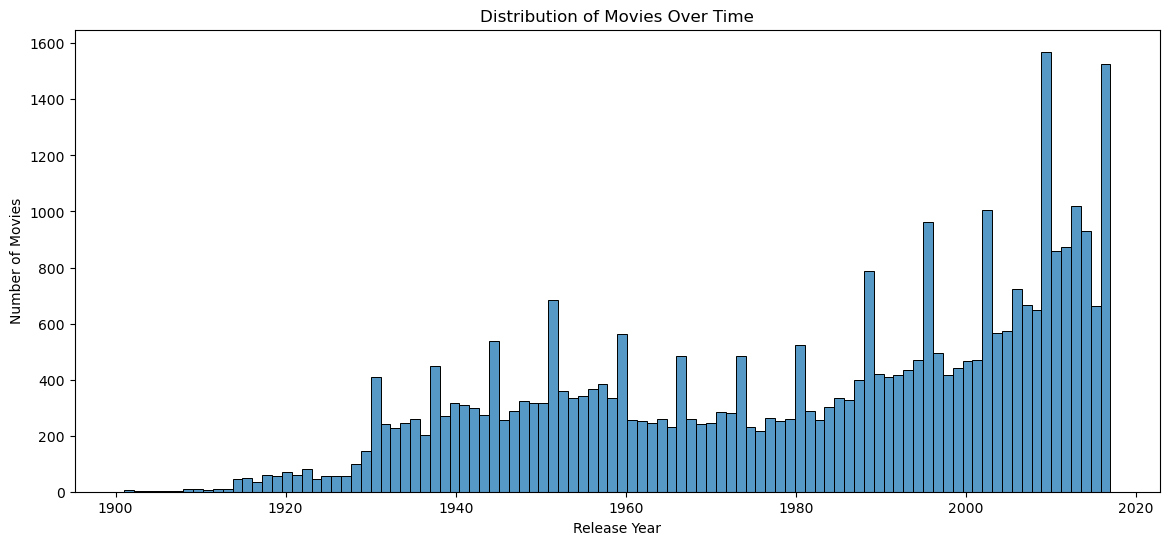

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.histplot(df['Release Year'], bins=100, kde=False)
plt.title('Distribution of Movies Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()


**Genre Popularity**
* Analyze the popularity of genres over time. Given the diverse way genres are labeled in the dataset, you might need to clean or reclassify genres for meaningful analysis.



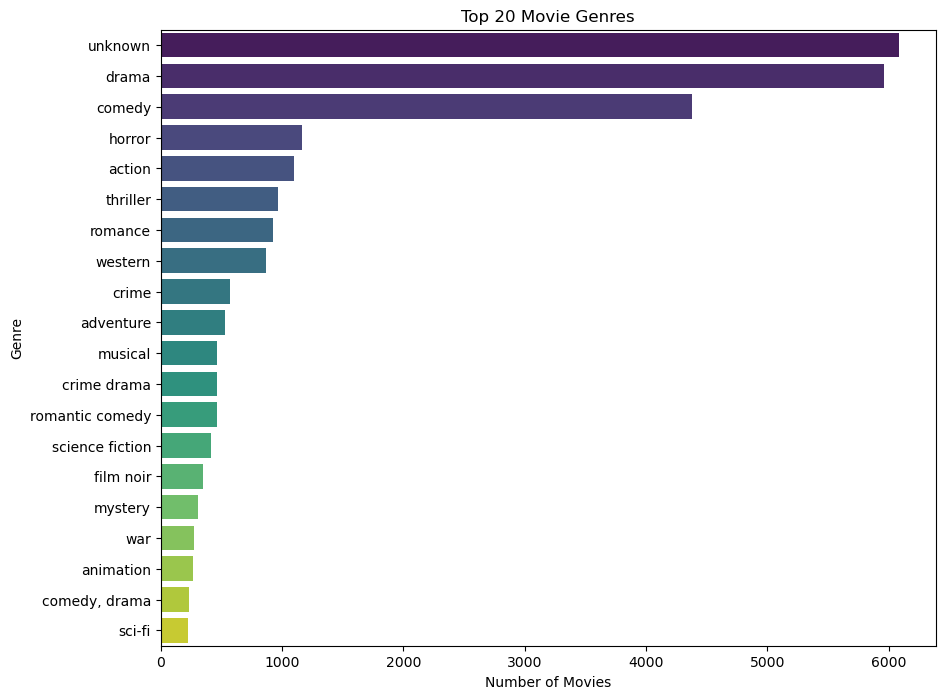

In [8]:
# Simple genre count (for detailed analysis, consider cleaning and consolidating genres)
genre_counts = df['Genre'].value_counts().head(20)  # Top 20 genres for simplicity
plt.figure(figsize=(10, 8))
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='viridis')
plt.title('Top 20 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


**Word Cloud of Movie Plots**
* Generate a word cloud to visualize the most common words found in movie plots. This can give insights into prevalent themes or topics.



In [ ]:
from wordcloud import WordCloud

# Combine all movie plots into one giant text
all_plots = ' '.join(df['Plot'].dropna())

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=200, contour_width=3, contour_color='steelblue', width=800, height=400)
wordcloud.generate(all_plots)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
 df_copy = df.copy()


In [11]:
import pandas as pd
import spacy
import re
from nltk.corpus import stopwords
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

# Load English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

# Custom stopwords list; you may adjust it as per your requirements
custom_stopwords = set(stopwords.words('english')) | STOP_WORDS

def preprocess_text(document):
    # Remove all non-word characters (everything except numbers and letters)
    document = re.sub(r"[^\w\s]", '', document)
    
    # Replace all runs of whitespaces with no space
    document = re.sub(r"\s+", '', document)
    
    # Replace numbers with a token
    document = re.sub(r"\d", 'DIGIT', document)
    
    # Tokenize document
    doc = nlp(document)
    
    # Lemmatization and stopword removal
    tokens = []
    for token in doc:
        if token.lemma_ not in custom_stopwords and token.pos_ != 'PUNCT' and token.is_alpha:
            tokens.append(token.lemma_.lower())
    
    # Reconstruct the document from tokens
    return " ".join(tokens)

# Assuming df is your DataFrame and 'Plot' contains the movie plots
df['Processed Plot'] = df['Plot'].apply(preprocess_text)


In [13]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased')

# Encode text function
def encode_text(text):
    encoded_input = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors='pt')
    with torch.no_grad():
        output = model(**encoded_input)
    return output.pooler_output[0].numpy()

# Apply the function to the dataset
df['Embeddings'] = df['Processed Plot'].apply(lambda x: encode_text(x))


In [14]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assuming `df['Embeddings']` is a list of numpy arrays for each movie plot
# Convert list of embeddings into a 2D array
embeddings_array = np.vstack(df['Embeddings'].values)

# Function to calculate similarities
def get_similar_movies(input_plot, k=5):
    # Encode the input plot
    input_embedding = encode_text(input_plot)
    
    # Calculate cosine similarities
    similarities = cosine_similarity([input_embedding], embeddings_array)
    
    # Get the indices of the top k similarities
    top_k_indices = np.argsort(similarities[0])[-k:]
    
    # Retrieve the corresponding movie titles
    recommended_movies = df.iloc[top_k_indices]['Title']
    
    return recommended_movies

# Example usage
input_plot = "A group of friends go on an adventure to find a hidden treasure."
recommended_movies = get_similar_movies(input_plot, k=5)
print(recommended_movies)


32888               Sanjuro
22794           The Mermaid
28411             Cleopatra
7429     Walk Like a Dragon
29552              Achchani
Name: Title, dtype: object


In [15]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Assuming the DataFrame `df` exists and has been preprocessed to include 'Embeddings'

def semantic_search(k, input_plot, genre=None, release_year=None):
    # Encode the input plot to get its BERT embedding
    input_embedding = encode_text(input_plot).reshape(1, -1)
    
    # Filter the DataFrame based on genre and release_year if provided
    filtered_df = df.copy()
    if genre is not None:
        filtered_df = filtered_df[filtered_df['Genre'].str.contains(genre, case=False, na=False)]
    if release_year is not None:
        filtered_df = filtered_df[filtered_df['Release Year'] == release_year]
    
    # Ensure there are movies left after filtering
    if filtered_df.empty:
        return "No movies found with the given criteria."
    
    # Extract embeddings for the filtered movies
    embeddings_array = np.vstack(filtered_df['Embeddings'].values)
    
    # Calculate cosine similarities between the input plot embedding and the filtered movie embeddings
    similarities = cosine_similarity(input_embedding, embeddings_array).flatten()
    
    # Get the indices of the top k similarities
    top_k_indices = similarities.argsort()[-k:][::-1]
    
    # Retrieve the recommended movies' details
    recommended_movies = filtered_df.iloc[top_k_indices]
    
    return recommended_movies[['Title', 'Release Year', 'Genre']]

# Example usage
K = 5
plot = "A group of friends go on an adventure to find a hidden treasure."
genre = None  # or specify a genre e.g., "Adventure"
release_year = None  # or specify a year e.g., 2020

results = semantic_search(K, plot, genre, release_year)
print(results)


                    Title  Release Year                     Genre
29552            Achchani          1978                   unknown
7429   Walk Like a Dragon          1960                     drama
28411           Cleopatra          2013                     drama
22794         The Mermaid          2016  drama / romance / sci-fi
32888             Sanjuro          1962                   unknown


In [16]:
embeddings_array = np.vstack(df['Embeddings'].values)
def recommend_movies_based_on_user_preferences(user_liked_movies, k=None):
    """
    Recommend movies based on a list of movie titles the user has rated highly.
    If k is not defined, recommend all movies ranked by their similarity.
    
    Parameters:
    - user_liked_movies: list of movie titles the user likes
    - k: number of movies to recommend, or None to recommend all
    
    Returns:
    - A list of recommended movie titles
    """
    # Aggregate embeddings of user liked movies
    user_pref_embeddings = np.mean([df[df['Title'] == title]['Embeddings'].values[0] for title in user_liked_movies], axis=0).reshape(1, -1)
    
    # Calculate cosine similarities between user preferences and all movie embeddings
    similarities = cosine_similarity(user_pref_embeddings, embeddings_array).flatten()
    
    # If k is not defined, recommend all movies, otherwise recommend top k
    if k is None:
        k = len(similarities)
    
    # Get the indices of the top k similarities
    top_k_indices = np.argsort(similarities)[-k:][::-1]
    
    # Retrieve the corresponding movie titles
    recommended_movies = df.iloc[top_k_indices]['Title']
    
    return recommended_movies

# Example usage without specifying k (recommends all movies ranked by similarity)
user_liked_movies = ["Kansas Saloon Smashers", "Jack and the Beanstalk"]
recommended_movies = recommend_movies_based_on_user_preferences(user_liked_movies,k=5)
print("Recommended Movies Based on Your Preferences:")
print(recommended_movies.tolist())


Recommended Movies Based on Your Preferences:
['İstanbul Kırmızısı', 'Sleepwalkers', 'Ruby', 'Samantha', 'Samurai Vampire Bikers From Hell']


In [17]:
# df_copy.columns

In [18]:
pip install transformers 


Note: you may need to restart the kernel to use updated packages.


In [34]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

class MoviePlotGenerator:
    def __init__(self, model_name='gpt2'):
        """
        Initializes the Movie Plot Generator with a specified GPT model.
        """
        self.tokenizer = GPT2Tokenizer.from_pretrained(model_name)
        # Set pad_token if it's not already set
        if self.tokenizer.pad_token is None:
            self.tokenizer.pad_token = self.tokenizer.eos_token

        self.model = GPT2LMHeadModel.from_pretrained(model_name)
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(self.device)

    def generate_plot(self, seed_text, max_new_tokens=100, num_return_sequences=1):
        """
        Generates a movie plot based on the seed text input.
        """
        # Encode the seed text
        encoding = self.tokenizer.encode_plus(
            seed_text,
            add_special_tokens=True,
            return_tensors='pt',
            padding='max_length',  # Ensures proper padding
            truncation=True,
            max_length=512  # Set to a typical max length for GPT-2 to avoid errors
        )

        input_ids = encoding['input_ids'].to(self.device)
        attention_mask = encoding['attention_mask'].to(self.device)

        # Generate text sequences
        output_sequences = self.model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask,
            max_new_tokens=max_new_tokens,  # Specify number of tokens to generate beyond the input
            num_return_sequences=num_return_sequences,
            no_repeat_ngram_size=2,
            top_k=50,
            top_p=0.95,
            temperature=0.7,
            pad_token_id=self.tokenizer.pad_token_id  # Ensuring pad_token_id is explicitly set
        )

        # Decode the output sequences to text
        plots = [self.tokenizer.decode(generated_sequence, skip_special_tokens=True, clean_up_tokenization_spaces=True)
                 for generated_sequence in output_sequences]

        return plots[0] if num_return_sequences == 1 else plots

# Example usage:
generator = MoviePlotGenerator()
seed_text = "In a world where AI has taken over, a small group of rebels"
generated_plot = generator.generate_plot(seed_text)
print("Generated Plot:\n", generated_plot)


Generated Plot:
 In a world where AI has taken over, a small group of rebels

are now fighting to stop the AI from taking over the world.
...



In [37]:
# Initialize the MoviePlotGenerator class as shown in the previous code snippet
generator = MoviePlotGenerator()

# Craft a seed text that includes the director and genre specifics
seed_text = "Director: Jane Doe. Genre: Science Fiction. In a distant future,"

# Generate the plot, specify max_new_tokens instead of max_length
generated_plot = generator.generate_plot(seed_text, max_new_tokens=150, num_return_sequences=1)

print("Generated Movie Plot:\n", generated_plot)


Generated Movie Plot:
 Director: Jane Doe. Genre: Science Fiction. In a distant future,

the world is a place of chaos and chaos.
...
 (The novel is about a young girl who is abducted by a group of aliens and is forced to live in a world where she is not allowed to speak to anyone.)
, a novel about an alien abduction. The novel was published in the United States in 1984. It was the first novel to be published by the publisher, and the second to have been published. (It was also the last novel published.) The book was written by John C. Reilly, who was a writer for the television series "The Walking Dead." The story was based on the novel by Robert Kirkman.
